<a href="https://colab.research.google.com/github/Tahimi/numericalMethods/blob/main/boundaryValuesProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

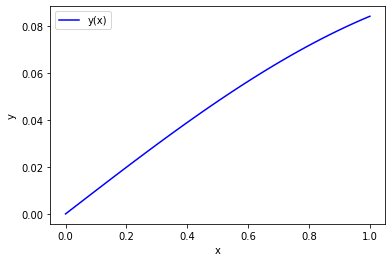

In [ ]:
# the Shooting method
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation
def f(x, y):
    return y[1], -np.sin(y[0])

# Define the boundary conditions
y_a = 0.0
y_b = 1.0

x_span = [0, 1]

# Define the shooting function
def shoot(guess):
    y0 = [y_a, guess]
    sol = solve_ivp(f, x_span, y0, dense_output=True)
    #print('guess = ', guess, ', sol.sol(1)[0] = ', sol.sol(1)[0])
    return sol.sol(1)[0] - y_b # com sol.sol(1)[0] = betaGuess, retorna 

# Solve the shooting problem using the bisection method
pInf = 0.1
pSup = np.pi/2
tol = 1e-6
while pInf - pSup > tol:
    pMedio = (pInf + pSup) / 2.
    if shoot(pMedio) * shoot(pInf) < 0:
        pSup = pMedio
    else:
        pInf = pMedio

# Get the solution using the final guess
sol = solve_ivp(f, x_span, [y_a, pInf], dense_output=True)
y = sol.sol(np.linspace(0, 1, 100))

# Plot the solution
plt.plot(np.linspace(0, 1, 100), y[0], 'b-', label='y(x)')
#plt.plot(np.linspace(0, 1, 100), y[1], 'r-', label="y'(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
y_a = 0.0
pInf = 0
def f(x, y):
    return y[1], -np.sin(y[0])
x_span = [0, 1]
y0 = [y_a, pInf]
sol = solve_ivp(f, x_span, y0, dense_output=True)
print('betaInf = sol.sol(1)[0] = ', sol.sol(1)[0])

y_b = 1.0
print('diff = ', sol.sol(1)[0] - y_b)

betaInf = sol.sol(1)[0] =  0.0
diff =  -1.0


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
y_a = 0.0
pSup = np.pi/2
def f(x, y):
    return y[1], -np.sin(y[0])
x_span = [0, 1]
y0 = [y_a, pSup]
sol = solve_ivp(f, x_span, y0, dense_output=True)
print('betaSup = sol.sol(1)[0] = ', sol.sol(1)[0])

y_b = 1.0
print('diff = ', sol.sol(1)[0] - y_b)

betaSup = sol.sol(1)[0] =  1.3457891155053074
diff =  0.34578911550530744


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
y_a = 0.0
pMedio = (0 + np.pi/2) / 2.
def f(x, y):
    return y[1], -np.sin(y[0])
x_span = [0, 1]
y0 = [y_a, pMedio]
sol = solve_ivp(f, x_span, y0, dense_output=True)
print('betaM = sol.sol(1)[0] = ', sol.sol(1)[0])

y_b = 1.0
print('diff = ', sol.sol(1)[0] - y_b)

betaM = sol.sol(1)[0] =  0.6639567601105767
diff =  -0.3360432398894233


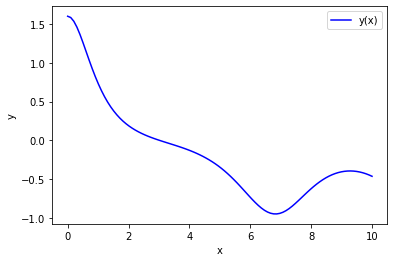

In [ ]:
# a nonlinear problem, (found in the context of light propagation)
# ODE: y'' + (1./x) * y' - y + 2*y**3 = 0, 0 < x < infinity
# BCs: y'(0) = 0 and y(infinity) = 0
# solving the problem using the Shooting method,
# obs. infinity = 10, (this is big anough)
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation
def f(x, y):
    return y[1], -(1./x) * y[1] + y[0] - 2*y[0]**3

# Define the boundary conditions
yl_a = 0.0
y_b = 0.0

x_span = [1e-6, 10] # to avoid division by 0 the spatial interval started at 10−6

# Define the shooting function
def shoot(guess):
    y0 = [guess, yl_a]
    sol = solve_ivp(f, x_span, y0, dense_output=True)
    #print('guess = ', guess, ', sol.sol(1)[0] = ', sol.sol(1)[0])
    return sol.sol(1)[0] - y_b

# Solve the shooting problem using the bisection method
a = 1.5
b = 1.6
tol = 1e-9
while b - a > tol:
    c = (a + b) / 2.
    if shoot(c) * shoot(a) < 0:
        b = c
    else:
        a = c

# Get the solution using the final guess
sol = solve_ivp(f, x_span, [(a + b) / 2., yl_a], dense_output=True)
y = sol.sol(np.linspace(x_span[0], x_span[1], 100))

# Plot the solution
plt.plot(np.linspace(x_span[0], x_span[1], 100), y[0], 'b-', label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

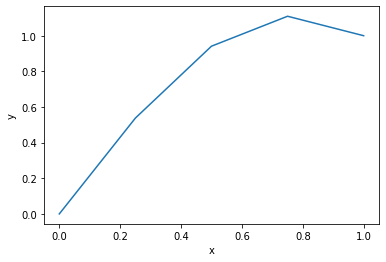

[[ 1.    0.    0.    0.    0.  ]
 [ 1.   -1.75  1.    0.    0.  ]
 [ 0.    1.   -1.75  1.    0.  ]
 [ 0.    0.    1.   -1.75  1.  ]
 [ 0.    0.    0.    0.    1.  ]]
[0. 0. 0. 0. 1.]


In [ ]:
# Finite diference method
# ODE: y''(x) + 4y(x) = 0, 0 < x < 1
# BCs: y(0) = 0, y(1) = 1
# centered difference formula: y''(x) ≈ [y(x+h) - 2y(x) + y(x-h)]/h^2
# [y(x+h) - 2y(x) + y(x-h)]/h^2 + 4y(x) = 0
# 1*y(x+h) + (-2+4h^2)*y(x) + 1*y(x-h) = 0, for 1 ≤ i ≤ n-2
# 1*y(x_(i+1)) + (-2+4h^2)*y(xi) + 1*y(x_(i-1)) = 0, for 1 ≤ i ≤ n-2
# 1*y_(i+1) + (-2+4h^2)*y_i + 1*y_(i-1) = 0, for 1 ≤ i ≤ n-2, i=1,2,3
# incógnitas y_i, i=1,2,3

import numpy as np
import matplotlib.pyplot as plt

# Define the number of points and the spacing
n = 5
h = 1/(n-1) # h = 1/4 = 0.25

# Define the coefficient matrix and the right-hand side vector
A = np.zeros((n, n)) # A.shape = (5,5)
rhs = np.zeros(n) # rhs.shape = (5,)
for i in range(1,n-1): # i = 1,2,3
    A[i,i] = -2+4*h**2 # A[1,1] = A[2,2] = A[3,3] = -2+4*0.25**2
    rhs[i] = 0. # rhs[1] = rhs[2] = rhs[3] = 0.
    A[i,i-1] = 1.
    A[i,i+1] = 1.

# Define the boundary conditions
y0 = 0
yN = 1

# insert the BCs into A and b
# left BC
A[0,0] = 1
rhs[0] = y0
# right BC
A[-1,-1] = 1
rhs[-1] = yN

# Solve the system of equations
y = np.linalg.solve(A, rhs)

# Plot the solution
x = np.linspace(0, 1, n)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print the matrix
print(A)
print(rhs)

In [ ]:
print(-2*np.ones(5)+ 4*0.25**2)

[-1.75 -1.75 -1.75 -1.75 -1.75]


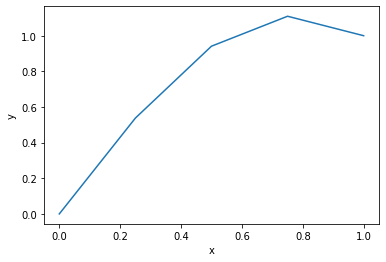

  (0, 0)	1.0
  (1, 0)	1.0
  (1, 1)	-1.75
  (1, 2)	1.0
  (2, 1)	1.0
  (2, 2)	-1.75
  (2, 3)	1.0
  (3, 2)	1.0
  (3, 3)	-1.75
  (3, 4)	1.0
  (4, 4)	1.0
[[ 1.    0.    0.    0.    0.  ]
 [ 1.   -1.75  1.    0.    0.  ]
 [ 0.    1.   -1.75  1.    0.  ]
 [ 0.    0.    1.   -1.75  1.  ]
 [ 0.    0.    0.    0.    1.  ]]
[0. 0. 0. 0. 1.]


In [ ]:
'''
the finite difference method is implemented using a point-wise approach, where
the solution y is updated one point at a time using the centered difference
formula for y''. Therefore, there is no need to define a matrix or RHS vector
explicitly as in the case of a linear system of equations. Instead, we can
update the solution y directly using the finite difference approximation.
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
import scipy.sparse.linalg as spla

# Define the number of points and the spacing
n = 5
h = 1/(n-1) # h = 1/999 = 0.001001001...

# Define the coefficient matrix and the right-hand side vector
diagL1 = np.ones(n-1); diagL1[-1] = 0
diagP = -2*np.ones(n) + 4*h**2; diagP[0] = diagP[-1] = 1
diagU1 = np.ones(n-1); diagU1[0] = 0

# Construct the coefficient matrix using diags
data = [diagL1, diagP, diagU1]
diagonals = [-1, 0, 1]
A = diags(data, diagonals, shape=(n, n), format='csr')

rhs = np.zeros(n)
rhs[-1] = 1

# Solve the system of equations
y = spla.spsolve(A, rhs)

# Plot the solution
x = np.linspace(0, 1, n)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print the matrix
print(A)
print(A.todense())
print(rhs)

In [ ]:
# the code to generate and print the matrix
import numpy as np

# Define the number of points and the spacing
n = 5
h = 1/(n-1)

# Define the coefficient matrix
A = np.zeros((n, n))
for i in range(1,n-1):
    A[i,i] = -2+4*h**2
    A[i,i-1] = 1
    A[i,i+1] = 1

# insert the BCs into A
# left BC
A[0,0] = 1
# right BC
A[-1,-1] = 1

# Print the matrix
print(A)

[[ 1.    0.    0.    0.    0.  ]
 [ 1.   -1.75  1.    0.    0.  ]
 [ 0.    1.   -1.75  1.    0.  ]
 [ 0.    0.    1.   -1.75  1.  ]
 [ 0.    0.    0.    0.    1.  ]]


In [ ]:
# the code to generate and print the RHS vector, b
import numpy as np

# Define the number of points and the spacing
n = 5
h = 1/(n-1)

# Define the coefficient matrix
b = np.zeros((n))
for i in range(1,n-1):
    b[i] = 0.

# Define the boundary conditions
y0 = 0
yN = 1

# insert the BCs into b
# left BC
b[0] = y0
# right BC
b[-1] = yN

# Print the matrix
print(b)

[0. 0. 0. 0. 1.]


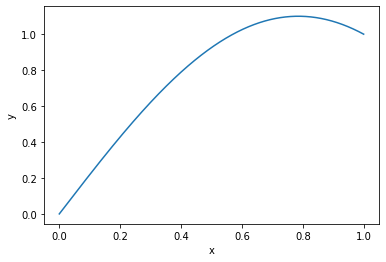

In [ ]:
'''
For large matrices, it is recommended to use a specialized algorithm
for solving tridiagonal linear systems, such as the Thomas algorithm
(also known as the tridiagonal matrix algorithm). The Thomas algorithm
is an efficient method that takes advantage of the special structure
of tridiagonal matrices, and it has a computational cost that
is proportional to the number of unknowns in the system.
The Thomas algorithm works by first reducing the tridiagonal matrix
to upper triangular form, and then solving the resulting system
of equations using backward substitution.
First, the tridiagonal matrix that we are solving has a special
form where the diagonal elements are all equal to -2+4h^2,
and the off-diagonal elements are all equal to 1. This means that
we can simplify the Thomas algorithm by using the known tridiagonal
LU decomposition of the matrix, rather than computing the factors
explicitly.
'''
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points and the spacing
n = 100000
h = 1/(n-1)

# Define the coefficient matrix and the right-hand side vector
diag = np.full(n, -2+4*h**2)
offdiag = np.full(n-1, 1)
b = np.zeros(n)
b[0] = 0
b[-1] = 1

# Define the boundary conditions
y0 = 0
yN = 1

# Insert the boundary conditions into the right-hand side vector
b[0] = y0*h**2
b[-1] = yN*h**2

# Solve the system of equations using the tridiagonal LU decomposition
L = np.zeros((n, n))
U = np.zeros((n, n))
L[0, 0] = 1
U[0, 0] = diag[0]
for i in range(1, n):
    L[i, i-1] = offdiag[i-1]/U[i-1, i-1]
    U[i, i] = diag[i] - L[i, i-1]*offdiag[i-1]
    L[i, i] = 1
    if i < n-1:
        U[i, i+1] = offdiag[i]

y = np.zeros(n)
y[0] = y0
y[-1] = yN
for i in range(1, n-1):
    b[i] = b[i] - L[i, i-1]*b[i-1]
for i in range(n-2, 0, -1):
    y[i] = (b[i] - offdiag[i]*y[i+1])/U[i, i]
    
# Plot the solution
x = np.linspace(0, 1, n)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
import scipy.sparse as sp

# Define the coefficient matrix and the right-hand side vector
a = np.ones(n-2)
b = -2*np.ones(n-1) + 4*h**2
c = np.ones(n-2)

# Construct the coefficient matrix using diags
data = [a, b, c]
diagonals = [-1, 0, 1]
A = sp.diags(data, diagonals, shape=(n-1, n-1), format='csr')

# Convert the sparse matrix to a dense matrix and pretty print it
print(A.todense())

[[-1.75  1.    0.    0.  ]
 [ 1.   -1.75  1.    0.  ]
 [ 0.    1.   -1.75  1.  ]
 [ 0.    0.    1.   -1.75]]
